# EXPLORACIÓN DE LOS DATOS

<code> Proyecto NOVELLA </code>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("/Users/maria/Dropbox/UCM/PD1/pruebas-proyecto/LIBROS_COMPLETOS.csv")

In [95]:
df = df.iloc[:, 3:]

In [96]:
df.shape

(3769, 20)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3769 entries, 0 to 3768
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3707 non-null   object 
 1   Weeks on List     3707 non-null   float64
 2   potencialBS       3707 non-null   float64
 3   CurrentRating     3707 non-null   float64
 4   NumPage           3707 non-null   float64
 5   GenresList        3707 non-null   object 
 6   Type              3707 non-null   object 
 7   DatePublished     3707 non-null   object 
 8   SagaNumbe         3707 non-null   float64
 9   RedPerc           3707 non-null   float64
 10  BluePerc          3707 non-null   float64
 11  GreenPerc         3707 non-null   float64
 12  DaysDifference    3707 non-null   float64
 13  BelongSaga        3707 non-null   object 
 14  Price             3707 non-null   float64
 15  WordsTitle        3707 non-null   float64
 16  PriceFormat       3707 non-null   object 


In [98]:
df.describe()

,Weeks on List,potencialBS,CurrentRating,NumPage,SagaNumbe,RedPerc,BluePerc,GreenPerc,DaysDifference,Price,WordsTitle,BookInterest1M,Rating20Days,numRatings20Days
count,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3468.000000
mean,1.456164,0.149717,3.899560,357.064203,1.789857,0.479064,0.425943,0.441141,535.212031,18.333334,3.274076,24.786620,4.113528,193.092561
std,9.895073,0.356842,0.315322,118.747860,3.274676,0.230375,0.204522,0.198431,2890.631832,5.721527,1.597314,193.191337,0.368211,89.806354
min,0.000000,0.000000,2.520000,11.000000,0.000000,0.010000,0.010000,0.030000,20.000000,0.990000,1.000000,0.000000,2.000000,1.000000
25%,0.000000,0.000000,3.690000,304.000000,1.000000,0.285000,0.260000,0.280000,20.000000,14.990000,2.000000,0.000000,3.880000,115.000000
50%,0.000000,0.000000,3.920000,350.000000,1.000000,0.460000,0.400000,0.420000,20.000000,17.390000,3.000000,0.000000,4.140000,225.000000
75%,0.000000,0.000000,4.130000,400.000000,1.000000,0.670000,0.580000,0.590000,20.000000,21.005000,4.000000,0.000000,4.370000,275.000000
max,212.000000,1.000000,4.810000,2895.000000,58.000000,0.990000,0.940000,0.950000,65332.000000,68.490000,14.000000,2711.000000,5.000000,298.000000


### Ratios

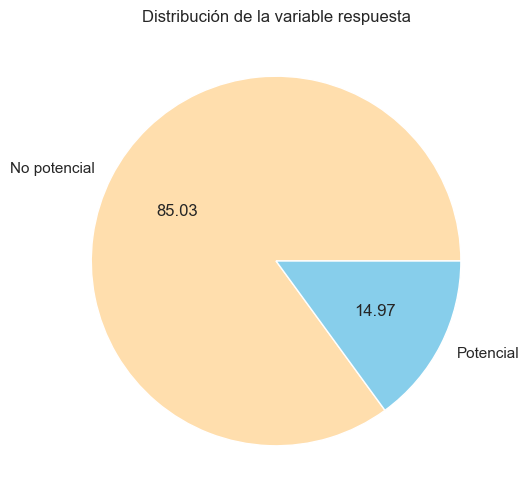

In [99]:
plt.figure(figsize=(6, 6))

counts = df["potencialBS"].value_counts()
plt.pie(counts, labels=["No potencial", "Potencial"], colors = ["NavajoWhite", "SkyBlue"],autopct='%1.2f')
plt.title('Distribución de la variable respuesta')
plt.show()

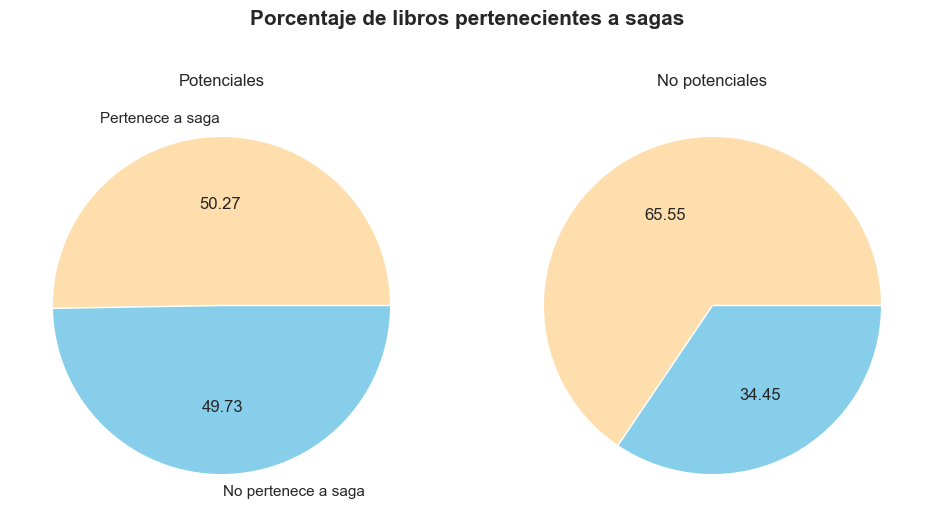

In [100]:
etiquetasSaga = ['Pertenece a saga', 'No pertenece a saga']

potencialSaga = df[df['potencialBS'] == 1]['BelongSaga'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(potencialSaga, labels=etiquetasSaga, autopct='%1.2f', colors = ["NavajoWhite", "SkyBlue"])
plt.title('Potenciales')

noPotencialSaga = df[df['potencialBS'] == 0]['BelongSaga'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(noPotencialSaga , autopct='%1.2f', colors = ["NavajoWhite", "SkyBlue"])
plt.title('No potenciales')

plt.suptitle("Porcentaje de libros pertenecientes a sagas", y=1.05, fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

### Géneros más presentes

In [134]:
# Dividimos la columna GenresList en listas de géneros

# Verificamos si el valor es nulo (NaN) antes de aplicar strip()
df['GenresList'] = df['GenresList'].apply(lambda x: x.strip('[]').replace("'", "").split(", ") if isinstance(x, str) else np.nan)


In [138]:
# Contamos el número de géneros distintos
generosDistintos = set()
for row in df['GenresList']:
    if isinstance(row, list):
        generosDistintos.update(row)

totalGeneros = len(generosDistintos)
print("Número de géneros distintos:", totalGeneros)

Número de géneros distintos: 332


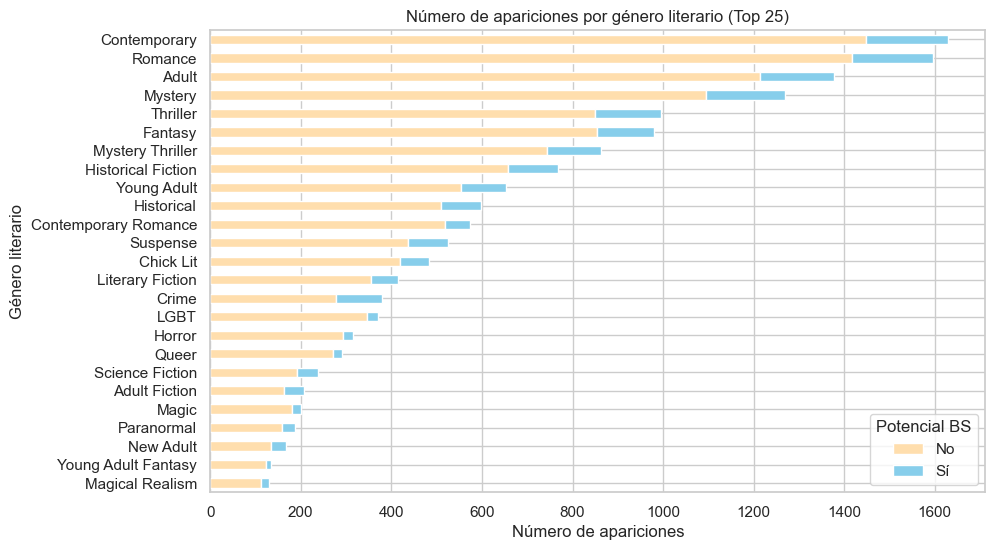

In [110]:
# Contamos las ocurrencias de cada género para cada valor de PotencialBS
generosPorPotencial = df.apply(lambda row: pd.Series(row['GenresList']), axis=1).stack().reset_index(level=1, drop=True)
generosPorPotencial.name = 'Genre'
generosPorPotencial = df.drop('GenresList', axis=1).join(generosPorPotencial)
generosPorPotencial= generosPorPotencial.groupby(['potencialBS', 'Genre']).size().unstack(fill_value=0)

# Seleccionamos los 15 primeros géneros (excluyendo "fiction" y "audiobook")
topGeneros = generosPorPotencial.sum().nlargest(27)[2:]

# Filtramos los géneros y reordenamos las columnas
generosPorPotencial = generosPorPotencial[topGeneros.index]

# Creamos el gráfico de barras apiladas
generosPorPotencial = generosPorPotencial.transpose()
generosPorPotencial.plot(kind='barh', stacked=True, figsize=(10, 6), color = ["NavajoWhite", "SkyBlue"])
plt.legend(title='Potencial BS', labels=['No', 'Sí'])
plt.title('Número de apariciones por género literario (Top 25)')
plt.xlabel('Número de apariciones')
plt.ylabel('Género literario')
plt.gca().invert_yaxis()
plt.show()

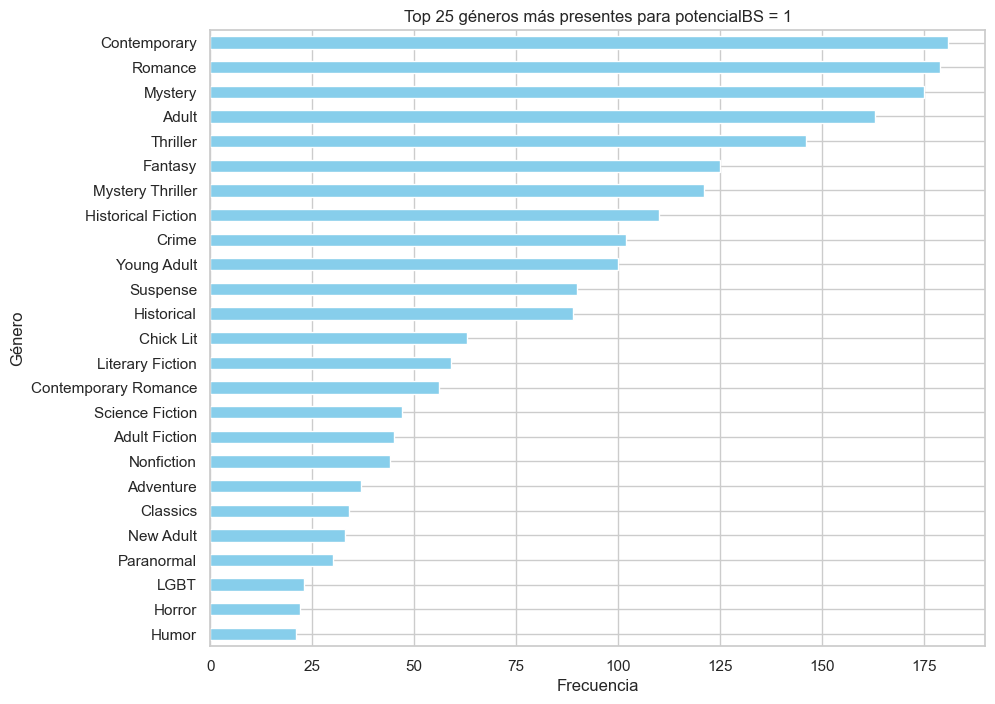

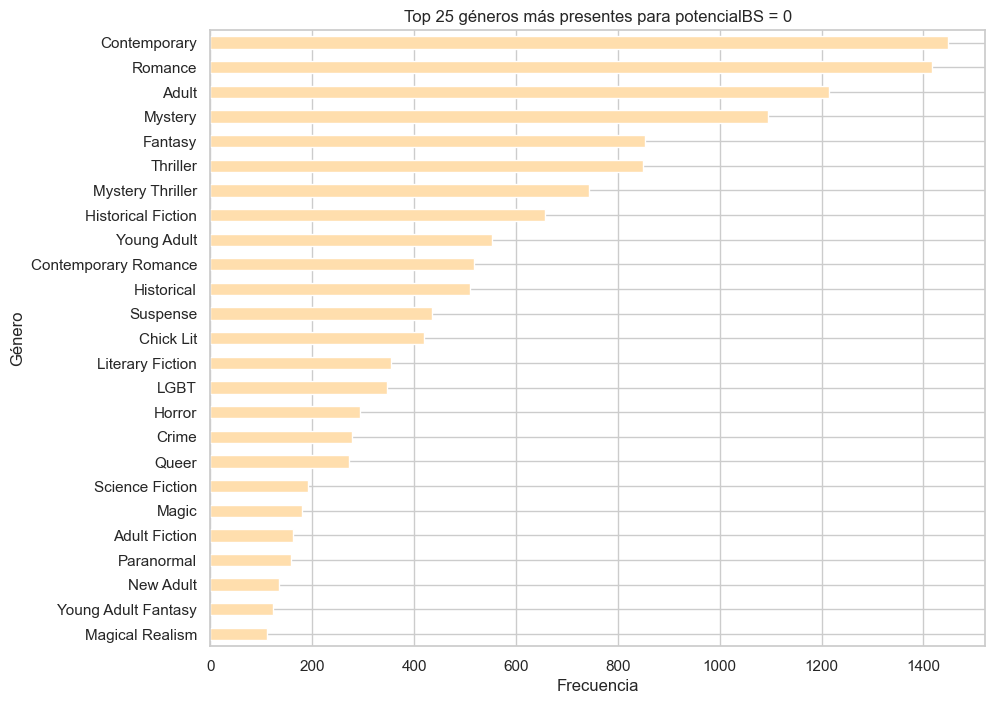

In [111]:
df_potential_1 = df[df['potencialBS'] == 1]
df_potential_0 = df[df['potencialBS'] == 0]

# Contamos la frecuencia de cada género para potencialBS = 1
generosPotencial = pd.Series([genre for sublist in df_potential_1['GenresList'] for genre in sublist]).value_counts()[2:].head(25)

# Contamos la frecuencia de cada género para potencialBS = 0
genre_counts_0 = pd.Series([genre for sublist in df_potential_0['GenresList'] for genre in sublist]).value_counts()[2:].head(25)

# Gráfico para potencialBS = 1
plt.figure(figsize=(10, 8))
generosPotencial.plot(kind='barh', color="SkyBlue")
plt.title('Top 25 géneros más presentes para potencialBS = 1')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.gca().invert_yaxis()
plt.show()

# Gráfico para potencialBS = 0
plt.figure(figsize=(10, 8))
genre_counts_0.plot(kind='barh', color="NavajoWhite" )
plt.title('Top 25 géneros más presentes para potencialBS = 0')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.gca().invert_yaxis()
plt.show()

### Diagramas de cajas y bigotes

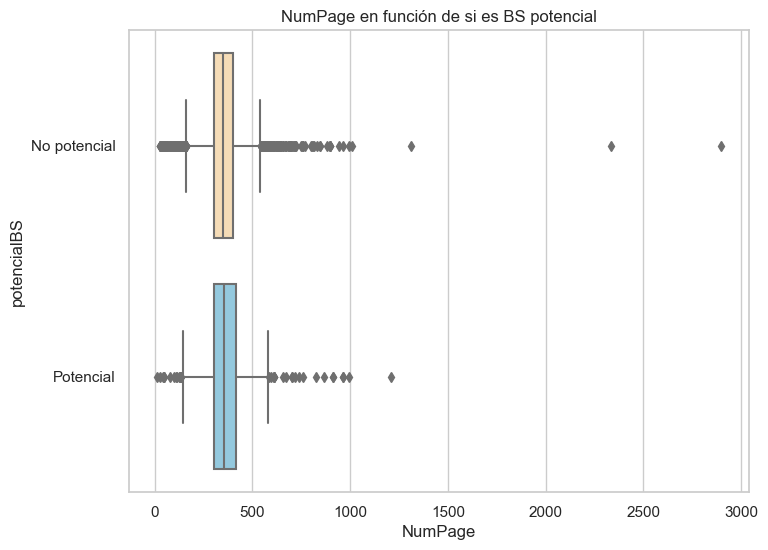

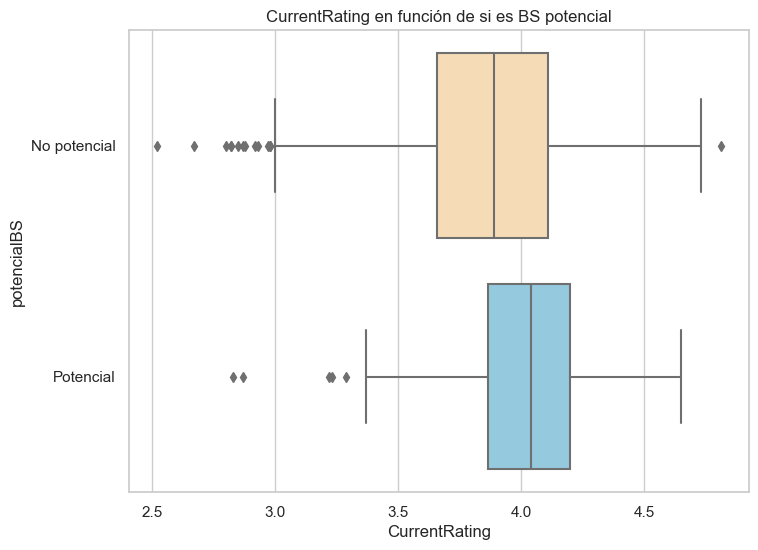

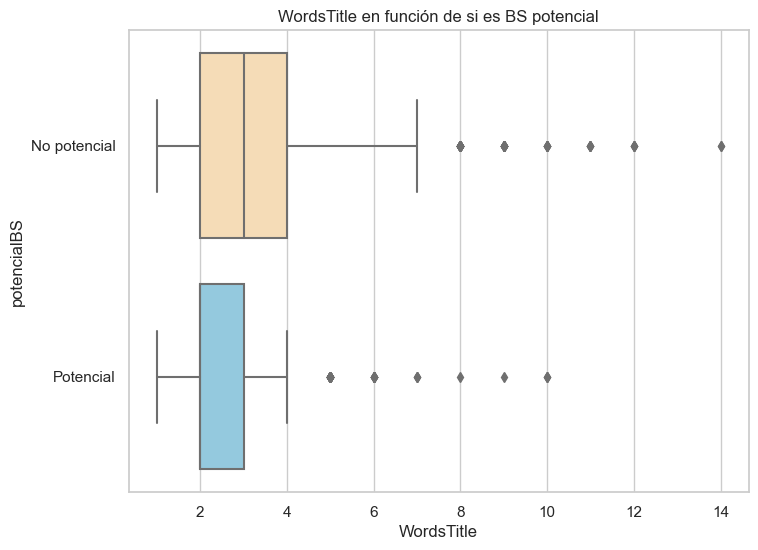

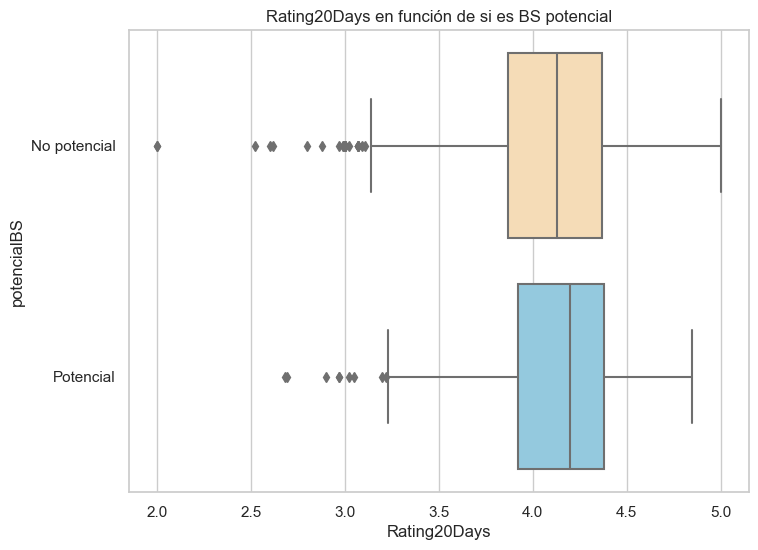

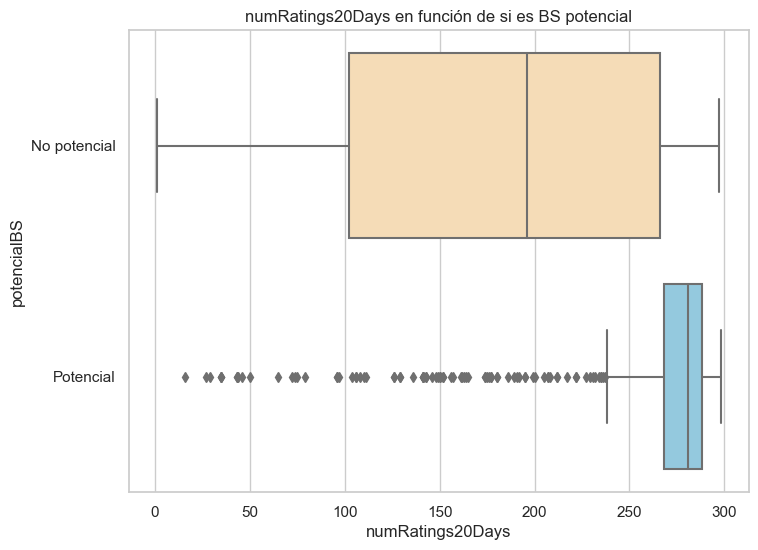

In [114]:
# Lista de variables 
variables = ['NumPage', 'CurrentRating', 'WordsTitle', 'Rating20Days', 'numRatings20Days']

colors = ["NavajoWhite", "SkyBlue"]

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y='potencialBS', x=variable, data=df, orient='h', palette = colors)
    plt.title(f'{variable} en función de si es BS potencial')
    plt.ylabel('potencialBS')
    plt.xlabel(variable)
    
    ax.set_yticklabels(['No potencial', 'Potencial'])
    
    plt.show()

Observaciones:
Aunque el diagrama de cajas y bigotes no es una interpretación perfecta de los datos, sí que nos sirve para tener una idea inicial de posibles factores importantes y diferencias entre las dos poblaciones.
- El número de páginas de los bestseller tiene un rango más pequeño y no suele haber ejemplares extremadamente largos
- El rating actual es superior en los bestseller
- Los títulos de los bestseller suelen ser más cortos
- Hay menos diferencia, pero el rating en los 20 primeros días tras su publicación también es más alto en los bestsellers
- El número de reseñas en goodReads en los 20 primeros días tras su publicación es significativamente más alto en los bestsellers, lo que indica que en general suelen ser más populares incluso antes de conseguir el título del NYT

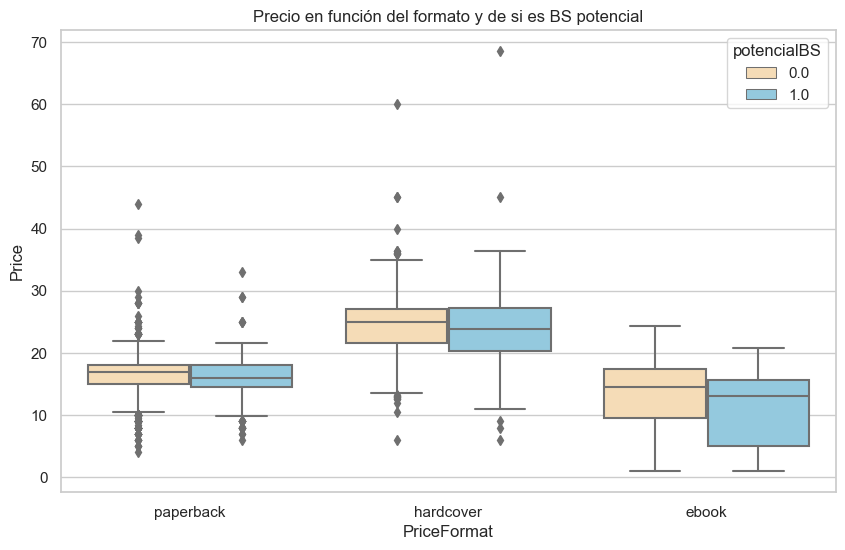

In [115]:
# Ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='PriceFormat', y='Price', hue='potencialBS', data=df, palette = colors)

# Añadir título y etiquetas a los ejes
plt.title('Precio en función del formato y de si es BS potencial')
plt.xlabel('PriceFormat')
plt.ylabel('Price')

# Mostrar el gráfico
plt.show()

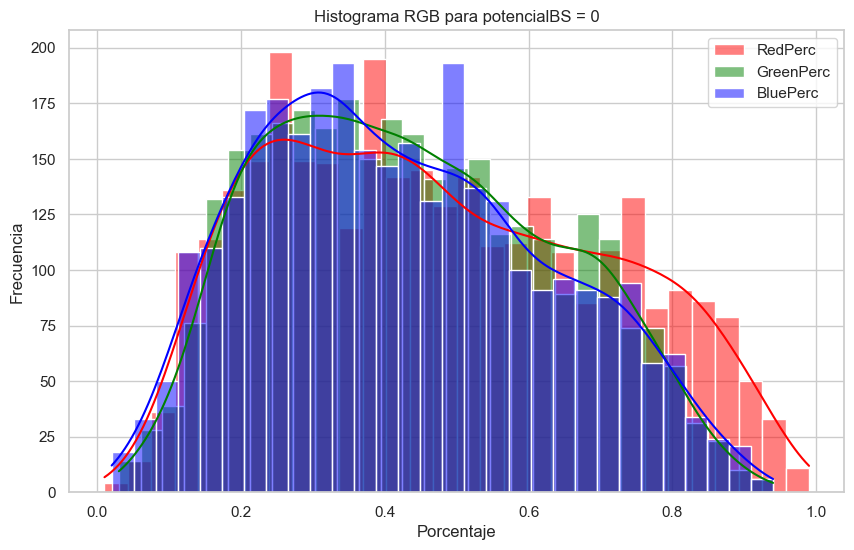

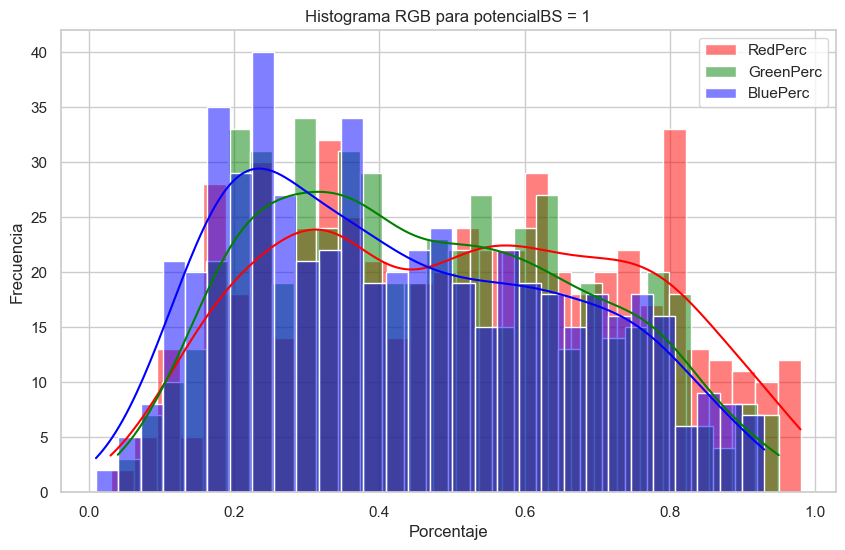

In [116]:
for i in range(0, 2):
    df1 = df[df["potencialBS"] == i]
    
    # Ajusta el tamaño de la figura si es necesario
    plt.figure(figsize=(10, 6))

    # Histograma para RedPerc
    sns.histplot(df1['RedPerc'], color='red', bins=30, kde=True, alpha=0.5, label='RedPerc')

    # Histograma para GreenPerc
    sns.histplot(df1['GreenPerc'], color='green', bins=30, kde=True, alpha=0.5, label='GreenPerc')

    # Histograma para BluePerc
    sns.histplot(df1['BluePerc'], color='blue', bins=30, kde=True, alpha=0.5, label='BluePerc')

    # Añadir leyenda
    plt.legend()

    # Añadir título y etiquetas a los ejes
    plt.title(f'Histograma RGB para potencialBS = {i}')
    plt.xlabel('Porcentaje')
    plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

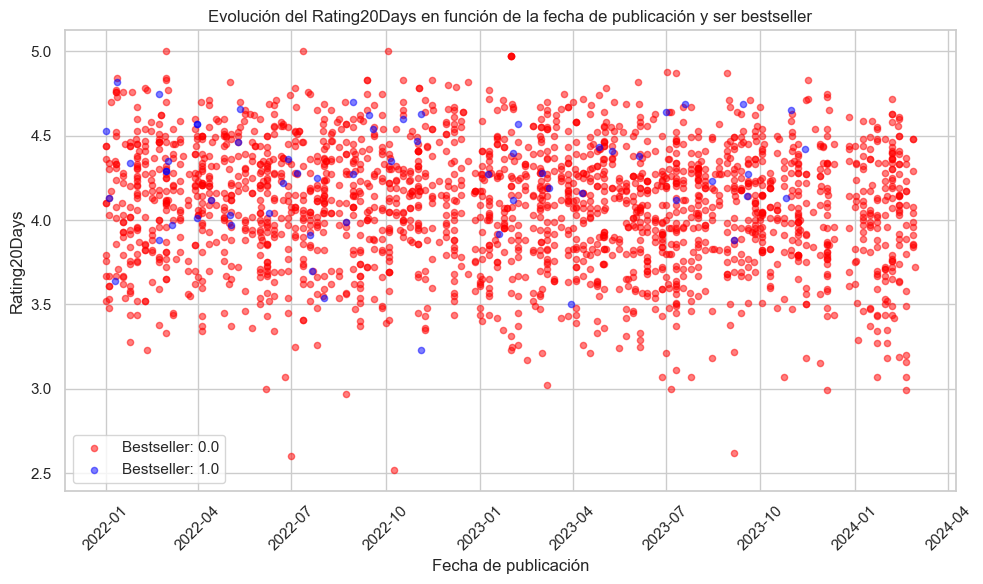

In [117]:

variable = 'Rating20Days'
# Convertir la columna 'DatePublished' a formato de fecha
df['DatePublished'] = pd.to_datetime(df['DatePublished'])

# Filtrar solo los libros a partir de 2018
df2 = df[df['DatePublished'].dt.year >= 2022]

# Ordenar el DataFrame por la columna 'DatePublished'
df2 = df2.sort_values(by='DatePublished')

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
colors = {True: 'blue', False: 'red'}
for bs, group in df2.groupby('potencialBS'):
    plt.scatter(group['DatePublished'], group[variable], s=20, alpha=0.5, color=colors[bs], label=f'Bestseller: {bs}', marker='o')
plt.xlabel('Fecha de publicación')
plt.ylabel(variable)
plt.title(f'Evolución del {variable} en función de la fecha de publicación y ser bestseller')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar que en general los bestselllers cuentan con valoraciones más altas, independientemente de la fecha de publicación.

### Correlaciones

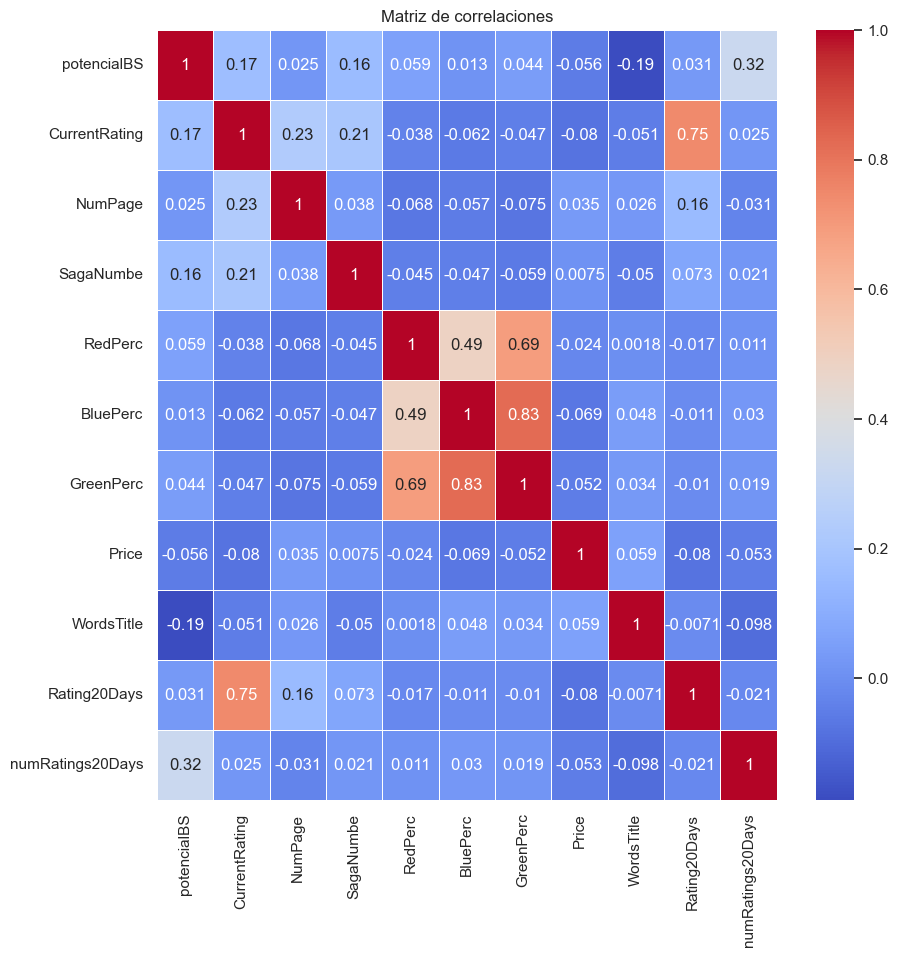

In [120]:
variablesCorrelacion = ["potencialBS", "CurrentRating", "NumPage", "SagaNumbe", "RedPerc", "BluePerc", "GreenPerc", "Price", "WordsTitle", 'Rating20Days', 'numRatings20Days']

# Calcula la matriz de correlación
correlation_matrix = df[variablesCorrelacion].corr()

# Crea el mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()

Aunque no hay muchas correlaciones, sí podemos observar una fuerte correlación positiva entre el rating a los 20 días de la publicación y el rating actual y entre los colores de la portada. Aunque no es demasiado alta, también observamos cierta correlación entre el número de reseñas a los 20 días y la variable respuesta.

### Análisis de las variables frente a la variable objetivo

In [121]:
df.head()

,Date,Weeks on List,potencialBS,CurrentRating,NumPage,GenresList,Type,DatePublished,SagaNumbe,RedPerc,BluePerc,GreenPerc,DaysDifference,BelongSaga,Price,WordsTitle,PriceFormat,BookInterest1M,Rating20Days,numRatings20Days
0,2019-02-17,4.0,1.0,3.85,312.0,"[Historical Fiction, Historical, Fiction, Adul...",hardcover,2019-01-08,1.0,0.53,0.56,0.54,40.0,False,14.49,6.0,paperback,0.0,3.83,267.0
1,2019-02-17,5.0,1.0,3.48,325.0,"[Romance, Fiction, Contemporary, Adult, Contem...",paperback,2018-10-30,2.0,0.60,0.79,0.71,110.0,True,14.99,2.0,paperback,632.0,3.90,267.0
2,2019-02-17,19.0,1.0,3.98,344.0,"[Historical Fiction, Historical, Fiction, Myst...",paperback,2018-08-28,1.0,0.54,0.49,0.56,173.0,False,14.39,4.0,paperback,0.0,4.16,285.0
3,2019-02-17,28.0,1.0,4.25,336.0,"[Nonfiction, Psychology, Mental Health, Leader...",hardcover,2015-08-25,1.0,0.74,0.80,0.78,1272.0,False,11.99,2.0,paperback,350.0,4.29,285.0
4,2019-02-17,9.0,1.0,3.86,393.0,"[Romance, Fiction, Contemporary, Holiday, Chri...",paperback,2018-10-18,1.0,0.49,0.59,0.50,122.0,False,14.99,4.0,paperback,0.0,4.28,281.0


In [122]:
varCat = ['GenresList', 'Type']

filtroBS = df['potencialBS'] == 1

df_bs = df[filtroBS]
df_nbs = df[~filtroBS]

Vamos a estudiar los valores de la media, mediana y desviación típica de las variables en función de si el libro al que pertenecen es bestseller o no.

In [123]:
df_bs.describe().iloc[1:, :].T

,mean,min,25%,50%,75%,max,std
Weeks on List,9.726126,1.0,1.0,3.0,6.0,212.0,23.966823
potencialBS,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CurrentRating,4.024505,2.83,3.865,4.04,4.2,4.65,0.265058
NumPage,364.246847,11.0,303.5,354.0,416.0,1207.0,127.082474
DatePublished,2011-10-15 13:55:27.567567616,1842-01-01 00:00:00,2011-07-06 00:00:00,2017-09-12 00:00:00,2020-03-30 12:00:00,2023-11-13 00:00:00,NaN
SagaNumbe,3.01982,1.0,1.0,1.0,2.0,55.0,5.968446
RedPerc,0.511315,0.03,0.315,0.51,0.71,0.98,0.238342
BluePerc,0.432252,0.01,0.235,0.4,0.61,0.93,0.224039
GreenPerc,0.462072,0.04,0.29,0.44,0.63,0.95,0.21601
DaysDifference,3461.245045,20.0,182.5,1272.0,3655.0,65332.0,6768.211724


In [124]:
df_nbs.describe().iloc[1:, :].T

,mean,min,25%,50%,75%,max,std
Weeks on List,0.0,0.0,0.0,0.0,0.0,0.0,0.0
potencialBS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CurrentRating,3.87756,2.52,3.66,3.89,4.11,4.81,0.318362
NumPage,355.799492,26.0,304.0,349.0,399.0,2895.0,117.194754
DatePublished,2020-08-29 08:43:05.786801920,1856-12-15 00:00:00,2021-09-27 18:00:00,2022-08-01 00:00:00,2023-05-16 00:00:00,2024-02-29 00:00:00,NaN
SagaNumbe,1.573287,0.0,1.0,1.0,1.0,58.0,2.456804
RedPerc,0.473385,0.01,0.28,0.45,0.66,0.99,0.228512
BluePerc,0.424832,0.02,0.26,0.4,0.57,0.94,0.200907
GreenPerc,0.437456,0.03,0.28,0.42,0.59,0.94,0.194976
DaysDifference,20.0,20.0,20.0,20.0,20.0,20.0,0.0


Observaciones:
- la media del rating, número de páginas y número de saga es ligeramente mayor en los bestseller
- los bestsellers en media tienen títulos más cortos
- hay mucho más interés en búsquedas online en los bestseller

### Análisis variables categóricas

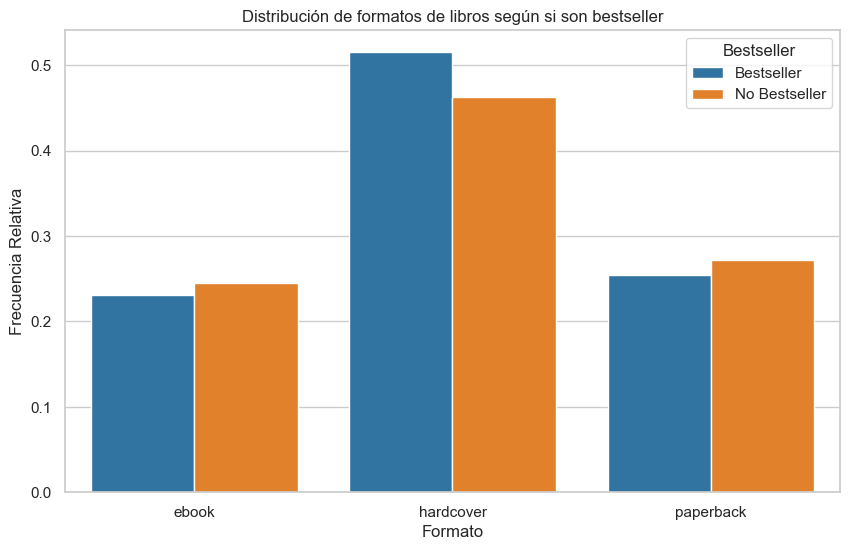

In [125]:
# Calculamos las frecuencias relativas
rf_bs = df_bs.groupby('Type').size() / len(df_bs)
rf_nbs = df_nbs.groupby('Type').size() / len(df_nbs)

# Juntamos las gráficas y reseteamos el índice
relative_frequencies = pd.concat([rf_bs, rf_nbs], axis=1)
relative_frequencies.reset_index(inplace=True)

relative_frequencies.columns = ['Tipo', 'Bestseller', 'No Bestseller']
relative_frequencies_melted = relative_frequencies.melt(id_vars='Tipo', var_name='Bestseller', value_name='Frecuencia Relativa')

sns.set(style="whitegrid")

# Dibujamos el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=relative_frequencies_melted, x='Tipo', y='Frecuencia Relativa', hue='Bestseller', palette="tab10")

plt.title("Distribución de formatos de libros según si son bestseller")
plt.xlabel("Formato")
plt.ylabel("Frecuencia Relativa")

plt.show()


Podemos observar que la distribución de los formatos es prácticamente igual en los libros bestsellers que los que no lo son. Hay ligeramente más formatos de tapa dura entre los bestsellers, pero seguramente no sea significativo ya que al ser libros tan populares pueden vender más aunque ese formato sea más caro que los otros.

In [126]:
generosPotencial, genre_counts_0

(Contemporary            181
 Romance                 179
 Mystery                 175
 Adult                   163
 Thriller                146
 Fantasy                 125
 Mystery Thriller        121
 Historical Fiction      110
 Crime                   102
 Young Adult             100
 Suspense                 90
 Historical               89
 Chick Lit                63
 Literary Fiction         59
 Contemporary Romance     56
 Science Fiction          47
 Adult Fiction            45
 Nonfiction               44
 Adventure                37
 Classics                 34
 New Adult                33
 Paranormal               30
 LGBT                     23
 Horror                   22
 Humor                    21
 Name: count, dtype: int64,
 Contemporary            1449
 Romance                 1417
 Adult                   1215
 Mystery                 1094
 Fantasy                  854
 Thriller                 850
 Mystery Thriller         743
 Historical Fiction       658
 Young 

Calculamos la frecuencia relativa de los géneros más vendidos en libros bestsellers y los que no lo son.

In [127]:
rf_generosPotencial = (generosPotencial / generosPotencial.sum()).sort_index()
rf_generosNoPotencial = (genre_counts_0 / genre_counts_0.sum()).sort_index()

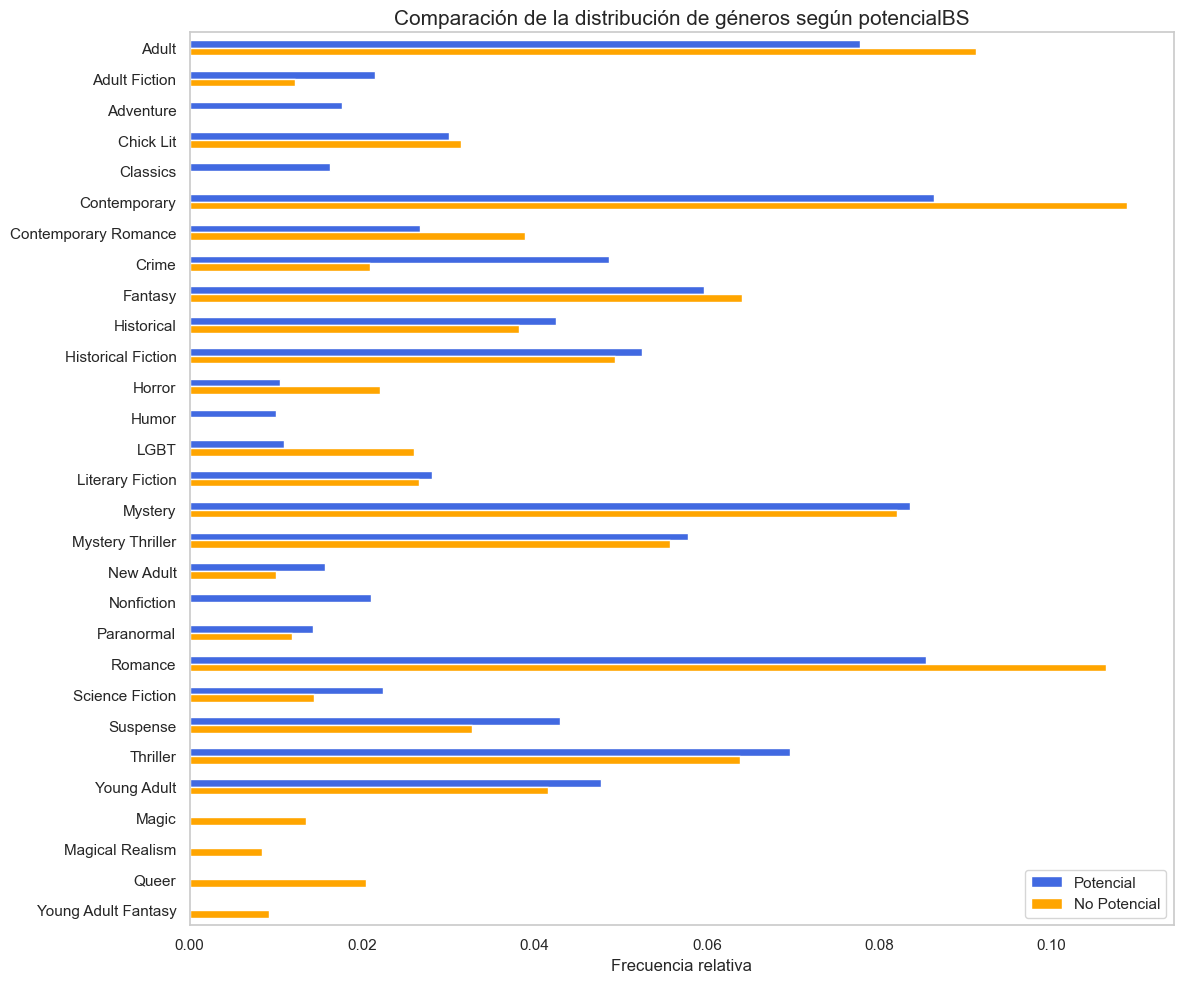

In [128]:
df = pd.concat([rf_generosPotencial, rf_generosNoPotencial], axis=1)
df.columns = ['Potencial', 'No Potencial']

# Dibujamos la gráfica
fig, ax = plt.subplots(figsize=(12, 10))

df.plot(kind='barh', ax=ax, color=['#4169E1', 'orange'])

ax.set_xlabel('Frecuencia relativa')
ax.set_title('Comparación de la distribución de géneros según potencialBS', fontsize=15)  
ax.invert_yaxis()  
ax.legend(loc='lower right')
ax.grid(False)

plt.tight_layout()  
plt.show()

Observaciones:
- la mayoría de géneros coinciden, aunque por ejemplo hay mucha más presencia de libros de no ficción o humor entre los bestseller, y de magia o romance fantástico entre los no bestseller
- los bestseller superan a los otros en ciencia ficción, thriller, adulto joven, misterio y ficción histórica y adulta
- los no bestseller cuentan con más títulos de romance, LGTB, fantasía y novela adutla y contemporánea
- en general no hay diferencias excesivamente grandes pero sí podemos ver tendencias diferentes para los libros que son bestseller y los que no